## Observations and Insights 

In [51]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_merge = pd.merge(mouse_metadata,study_results, on ="Mouse ID", how="outer")

# Display the data table for preview
mouse_study_merge.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [21]:
#drop any results with NA
mouse_study_merge = mouse_study_merge.dropna()
mouse_study_merge.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [22]:
# Checking the number of mice.
total_mousecount = len(mouse_study_merge["Mouse ID"])
unique_mousecount = mouse_study_merge["Mouse ID"].nunique()
print (f"This data set includes \033[1m{unique_mousecount}\033[0m mice and \033[1m{total_mousecount}\033[0m rows of data.")

This data set includes 249 mice and 1893 rows of data.


In [23]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouseID_timepoint = mouse_study_merge["Mouse ID"][mouse_study_merge.duplicated(["Mouse ID","Timepoint"])].reset_index()
duplicate_mouseID_timepoint

,index,Mouse ID
0,909,g989
1,911,g989
2,913,g989
3,915,g989
4,917,g989


In [24]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mouseID_timepoint = mouse_study_merge[mouse_study_merge.duplicated(["Mouse ID","Timepoint"])]
duplicate_mouseID_timepoint

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [75]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mouse_study = mouse_study_merge.drop_duplicates(subset = ["Mouse ID","Timepoint"], keep = "first")
cleaned_mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [76]:
# Checking the number of mice in the clean DataFrame.
new_total_mousecount = len(cleaned_mouse_study["Mouse ID"])
new_unique_mousecount = cleaned_mouse_study["Mouse ID"].nunique()
duplicates = total_mousecount - new_total_mousecount
print (f"This clean data set now includes \033[1m{new_unique_mousecount}\033[0m mice and \033[1m{new_total_mousecount}\033[0m rows of data. You removed \033[1m{duplicates}\033[0m duplicates.")

This clean data set now includes 249 mice and 1888 rows of data. You removed 5 duplicates.


## Summary Statistics

In [77]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

##Group By Drug Regimen
regimen_summary = cleaned_mouse_study.groupby(["Drug Regimen"])
regimen_summary.head()

##Generate summary statistics
regimen_summary_mean = round(regimen_summary["Tumor Volume (mm3)"].mean(),2)
regimen_summary_median = round(regimen_summary["Tumor Volume (mm3)"].median(),2)
regimen_summary_variance = round(regimen_summary["Tumor Volume (mm3)"].var(),2)
regimen_summary_stddev = round(regimen_summary["Tumor Volume (mm3)"].std(),2)
regimen_summary_sem = round(regimen_summary["Tumor Volume (mm3)"].sem(),2)

#Combine statistics into summary dataframe
regimen_summary_table = pd.DataFrame({"Mean":regimen_summary_mean,"Median":regimen_summary_median,"Variance":regimen_summary_variance,"Std Deviation":regimen_summary_stddev,"SEM":regimen_summary_sem})
regimen_summary_table

#Credit: terrylashley/Drug_Study_Analysis on GitHub https://github.com/terrylashley/Drug_Study_Analysis/blob/master/Pymaceuticals/pymaceuticals_starter.ipynb


,Mean,Median,Variance,Std Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [79]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

regimen_summary_oneline = round(cleaned_mouse_study.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg([np.mean,np.median,np.var,np.std,st.sem]),2)
regimen_summary_oneline

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

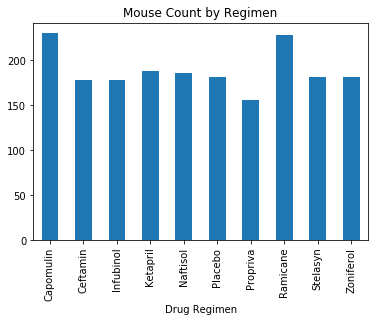

In [104]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

micecount = cleaned_mouse_study.groupby(["Drug Regimen"])["Mouse ID"].count()

micecount.plot(kind='bar', x = "Regimen", y = "Count", title="Mouse Count by Regimen")
plt.savefig('mouse count by regimen.png')


In [116]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
## Create list of drug regimens
regimen = (cleaned_mouse_study.groupby(["Drug Regimen"])["Mouse ID"].count()).index.tolist()
regimen

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [117]:
## Create count of mice in each drug regimens cohort
mouse_count_byregimen = (cleaned_mouse_study.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
mouse_count_byregimen

[230, 178, 178, 188, 186, 181, 156, 228, 181, 182]

No handles with labels found to put in legend.


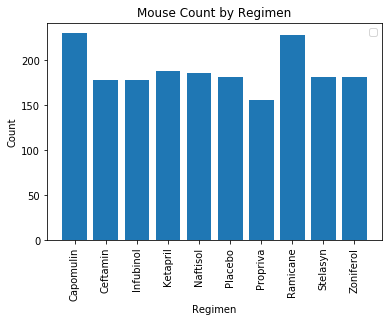

In [119]:
plt.bar(regimen,mouse_count_byregimen)
plt.xlabel("Regimen")
plt.ylabel("Count")
plt.title("Mouse Count by Regimen")
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [15]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [17]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [18]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
